In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

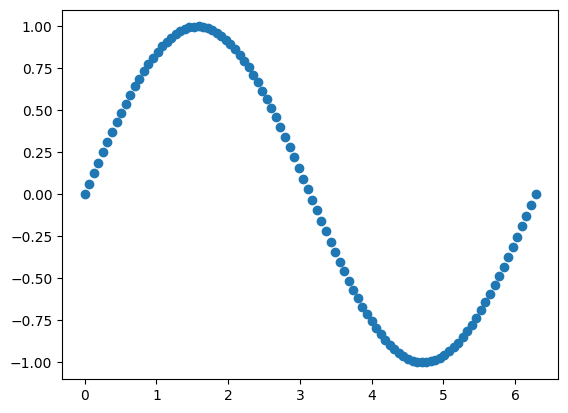

In [14]:
data=pd.read_csv('sine_curve_dataset.csv')
data.head()
data=data.values
# x=data[:,0].reshape((100,1))
x=data[:,0]
# y=data[:,1].reshape((x.size,1))
y=data[:,1]
plt.scatter(x,y)




In [15]:
# shapes of dataset
print('shape of x: ',x.shape)
print('shape of y: ',y.shape)
# part1=np.linalg.inv(np.dot(x.T,x))
# part2=np.dot(x.T,y)
# theta=np.dot(part1,part2)
# print('Theta from direct approach: ',theta)

shape of x:  (100,)
shape of y:  (100,)


In [16]:
def model(x,y,tau,p):
    # theta=np.zeros((x.shape[1],1))
    # weight=np.empty(shape=x.shape[0])
    p=np.array(p)
    # print('p: ',p.shape)

    weight=np.exp(-(np.square(x-p)/2*tau**2))
    # checking_x=np.square(x-p)
    # print(checking_x.shape)
    # print('shape of weight before: ',weight.shape)
    # print('value of weights: ',weight)
    weight=np.diag(weight)

    x = np.column_stack((np.ones_like(x),x))
    # new_row=np.ones((x.shape[0],1))
    # x=np.hstack((new_row,x))
    # print('shape of weight: ',weight.shape)
    # print('shape of x: ',x.shape)
    
    
    # h_theta=np.dot(x,theta)
    # print('shape of h_theta: ',h_theta.shape)
    # j_theta=weight*(np.square(y-np.dot(x,theta)))

    # TO SEE THE DIFFERENCE BETWEEN THE LINEAR REGRESSION AND LOCALLY WEIGHTED LINEAR REGRESSION JUST CHANGE REMOVE THE WEIGHT AND THEN OBSERVE THE PLOT BELOW
    theta=np.linalg.inv(x.T @ weight @ x) @ (x.T @ weight @ y)
    return theta



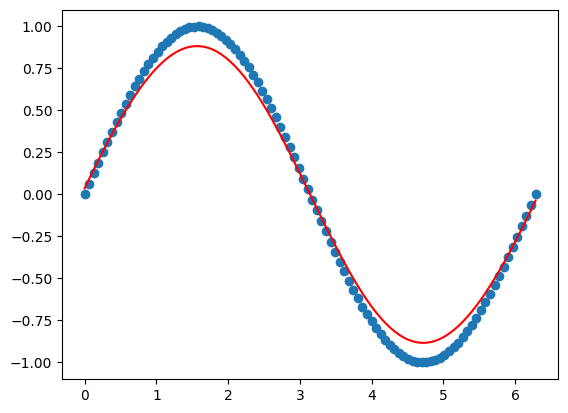

In [17]:
p=0
tau=2
# theta=model(x,y,tau,p)
# print('theta: ',theta)
# print('shape of theta: ',theta.shape)
# output=theta[0]*p+theta[1]
# print('output: ',output)
outputs=[]
for i in range(x.size):
    p=x[i]
    # print('p: ',p)
    theta=(model(x,y,tau,p))

    #  DO WE NEED TO CHANGE THIS OUTPUT FUNCTION TO GET NON LINEAR FITTING AUTOMATICALLY
    # OUTPUT SHOULD BE THETA .T *X AS PER NOTES but fitting is not nice from theta.T*x can see by comparing the output function 
    # output=theta[0]*x[0]+theta[1]*x[1]
    # print(x[i])
    output=theta[0]+theta[1]*p # how this ouput function came : same as theta.T x just it's taking shape of x before model function which is (100,) so anyways x[0] is always 1 so no need to multiply that
    outputs.append(output)
y=np.array(outputs)
x=data[:,0]
y_data=data[:,1]
plt.scatter(x,y_data)
plt.plot(x,y,label='Fitted line',color='red')